In [8]:
from config import owmapi_key
from citipy import citipy
import random
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Plot settings
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

In [9]:
#Setting zones for the latitude and longitude
lat_z = np.arange(-90,90,15)
lon_z = np.arange(-200,200,15)

# Data frame containing latitude and longitudes
cities_df = pd.DataFrame()

cities_df["Latitude"] = ''
cities_df["Latitude"] = ''

for x in lat_z:
        for y in lon_z:
            x_values = list(np.arange(x,x+15,0.01))
            y_values = list(np.arange(y,y+15,0.01))
            lats = random.sample(x_values,50)
            lons = random.sample(y_values,50)
            lat_samples = [(x+dec_lat) for dec_lat in lats]
            lon_samples = [y+dec_lon for dec_lon in lons]
            cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))            
cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,Latitude,Longitude
0,-167.37,-397.62
1,-166.84,-397.94
2,-170.33,-393.55
3,-170.30,-394.84
4,-166.03,-396.24


In [10]:
# For the selected coordinates, use citipy to associate them with nearest city.

cities_df["Closest City Name"] = ""
cities_df["Closest Country Code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City Name",city.city_name)
    cities_df.set_value(index,"Closest Country Code",city.country_code)

In [29]:
#Creating a new Data Frame that contains  the Names and Codes
#of the cities that are the closest to the points found above
clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df = clean_cities_df.drop_duplicates()
#Print Data Frame with the info from the Cities
clean_cities_df.head()

,Closest City Name,Closest Country Code
0,vaini,to
379,mataura,pf
400,punta arenas,cl
404,ushuaia,ar
692,bredasdorp,za


In [30]:
clean_cities_df.shape

(884, 2)

In [13]:
#since we have 884 samples, we need to grab only 500 of those
selected_cities = clean_cities_df.sample(500)
selected_cities = selected_cities.reset_index(drop=True)

In [18]:
# Setting up values for OpenWeatherMap API calls
base_url = "http://api.openweathermap.org/data/2.5/weather"

app_id = owmapi_key

params = { "appid" :app_id,"units":"metric" }

for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City Name"]},{row["Closest Country Code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))

Retrieving weather information for kenai,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kenai%2Cus
Retrieving weather information for mrirt,ma
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mrirt%2Cma
Retrieving weather information for nirgua,ve
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=nirgua%2Cve
Retrieving weather information for tuktoyaktuk,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=tuktoyaktuk%2Cca
Retrieving weather information for sahrak,af
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sahrak%2Caf
Retrieving weather information for pareora,nz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=pareora%2Cnz
Retrieving weather information for banda aceh,id
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=banda+aceh%2Cid
Retrieving weather information for mata

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=roebourne%2Cau
Retrieving weather information for port hawkesbury,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=port+hawkesbury%2Cca
Retrieving weather information for iwanai,jp
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=iwanai%2Cjp
Retrieving weather information for belfast,za
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=belfast%2Cza
Retrieving weather information for santiago del estero,ar
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=santiago+del+estero%2Car
Retrieving weather information for kaeo,nz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kaeo%2Cnz
Retrieving weather information for tasiilaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=tasiilaq%2Cgl
Retrieving weather information for antalaha,mg
http

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ozark%2Cus
Retrieving weather information for figeac,fr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=figeac%2Cfr
Retrieving weather information for ketou,bj
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ketou%2Cbj
Retrieving weather information for oxford,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=oxford%2Cus
Retrieving weather information for lebanon,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=lebanon%2Cus
Retrieving weather information for bunia,cd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bunia%2Ccd
Retrieving weather information for karasjok,no
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=karasjok%2Cno
Retrieving weather information for port hedland,au
http://api.openweathermap.org/data/2.5/weather?a

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=maryville%2Cus
Retrieving weather information for yarmouth,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=yarmouth%2Cca
Retrieving weather information for yatou,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=yatou%2Ccn
Retrieving weather information for humaita,py
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=humaita%2Cpy
Retrieving weather information for vaini,to
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=vaini%2Cto
Retrieving weather information for denton,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=denton%2Cus
Retrieving weather information for xilopolis,gr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=xilopolis%2Cgr
Retrieving weather information for puerto baquerizo moreno,ec
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=juba%2Csd
Retrieving weather information for medea,dz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=medea%2Cdz
Retrieving weather information for kratovo,mk
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kratovo%2Cmk
Retrieving weather information for arcata,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=arcata%2Cus
Retrieving weather information for ruatoria,nz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ruatoria%2Cnz
Retrieving weather information for pozo colorado,py
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=pozo+colorado%2Cpy
Retrieving weather information for sidi ali,dz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sidi+ali%2Cdz
Retrieving weather information for busselton,au
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=alcaniz%2Ces
Retrieving weather information for formosa,ar
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=formosa%2Car
Retrieving weather information for batticaloa,lk
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=batticaloa%2Clk
Retrieving weather information for chokwe,mz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=chokwe%2Cmz
Retrieving weather information for sabzevar,ir
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sabzevar%2Cir
Retrieving weather information for dinghai,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=dinghai%2Ccn
Retrieving weather information for villa de san francisco,hn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=villa+de+san+francisco%2Chn
Retrieving weather information for verkhnyaya inta,

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=rocha%2Cuy
Retrieving weather information for meridian,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=meridian%2Cus
Retrieving weather information for bacuit,ph
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bacuit%2Cph
Retrieving weather information for mujiayingzi,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mujiayingzi%2Ccn
Retrieving weather information for mango,tg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mango%2Ctg
Retrieving weather information for akcakoca,tr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=akcakoca%2Ctr
Retrieving weather information for korla,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=korla%2Ccn
Retrieving weather information for caucaia,br
http://api.openweathermap.org/data/2.5/we

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=linhares%2Cbr
Retrieving weather information for santa cruz,cr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=santa+cruz%2Ccr
Retrieving weather information for castro,cl
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=castro%2Ccl
Retrieving weather information for puerto ayora,ec
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=puerto+ayora%2Cec
Retrieving weather information for touros,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=touros%2Cbr
Retrieving weather information for kudahuvadhoo,mv
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kudahuvadhoo%2Cmv
Retrieving weather information for brae,gb
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=brae%2Cgb
Retrieving weather information for salta,ar
http://api.openweathermap.

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=richmond%2Cza
Retrieving weather information for henties bay,na
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=henties+bay%2Cna
Retrieving weather information for paris,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=paris%2Cus
Retrieving weather information for iskateley,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=iskateley%2Cru
Retrieving weather information for ardistan,ir
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ardistan%2Cir
Retrieving weather information for upington,za
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=upington%2Cza
Retrieving weather information for belmonte,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=belmonte%2Cbr
Retrieving weather information for bartica,gy
http://api.openweathermap.

In [20]:
# Drop cities with missing information
selected_cities = selected_cities.dropna()

selected_cities.shape
selected_cities.to_csv("City_Weather_data.csv")

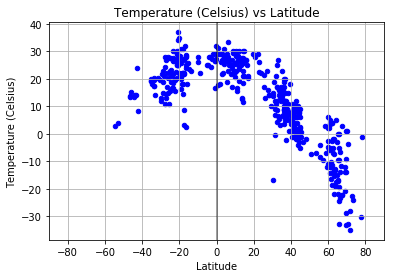

In [22]:
# Temperature vs Latitude 
selected_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.show()

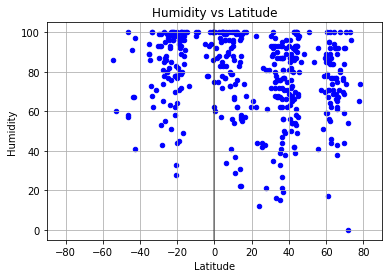

In [23]:
# Humidity vs Latitude 
selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude")
plt.show()

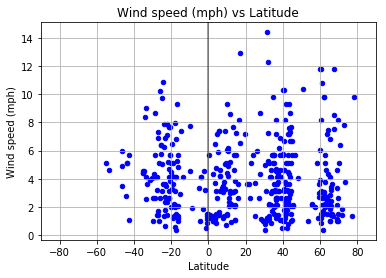

In [24]:
# Wind speed vs Latitude
selected_cities["Wind speed"] = pd.to_numeric(selected_cities["Wind speed"])
selected_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind speed vs Latitude")
plt.show()

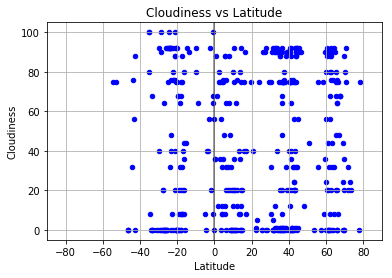

In [25]:
# Cloudiness vs Latitude
selected_cities["Cloudiness"] = pd.to_numeric(selected_cities["Cloudiness"])
selected_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness vs Latitude")
plt.show()

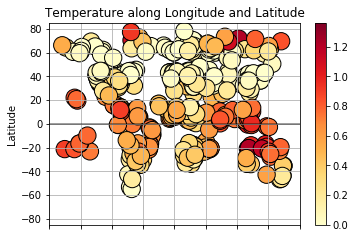

In [31]:
# Temperature approaching equator
size_temp = np.round((((selected_cities.Temperature)/100)**2)*10,2)

selected_cities.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=300,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.ylim([-85,85])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)
plt.savefig("Temperature approaching Equator")

plt.show()

 1. Temperatures get higher as you approach the equator from the plot above which shows the temperature distribution around the globe.

2. The majority of wind speeds are less the 15 MPH and are distrubuted evenly across measured cities.

3. There is no readily conclusive pattern to cloudiness across measured cities otherthan they tend to cluster toward the edges.